In [7]:
!pip install pandas numpy scikit-learn


In [11]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler


In [15]:
data = pd.read_csv('green_tech_data.csv')

In [17]:
data.head()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0


In [19]:
import pandas as pd

# Load the dataset
data = pd.read_csv('green_tech_data.csv')

# Check for null values
null_values = data.isnull().sum()

# Display the count of null values for each column
print("Null Values in Each Column:")
print(null_values)

# Optional: Check if there are any null values in the dataset
if null_values.sum() > 0:
    print("\nThe dataset contains null values.")
else:
    print("\nThe dataset has no null values.")


Null Values in Each Column:
carbon_emissions      0
energy_output         0
renewability_index    0
cost_efficiency       0
sustainability        0
dtype: int64

The dataset has no null values.


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sustainability
0    85
1    15
Name: count, dtype: int64


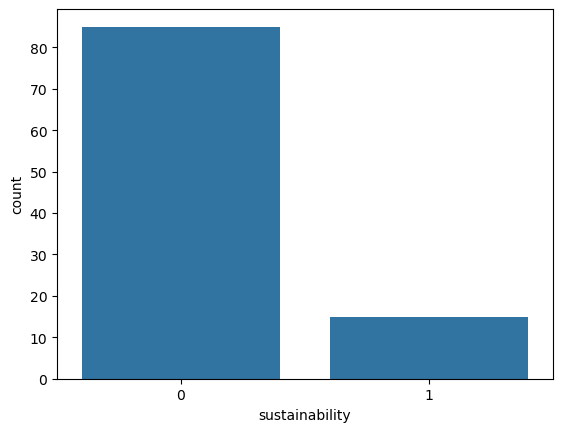

In [29]:
#check if data is balanced or not as we previously did data.head()

# Check for class imbalance
print(data['sustainability'].value_counts()) 
# Visualize class distribution
sns.countplot(x='sustainability', data=data) 
plt.show()

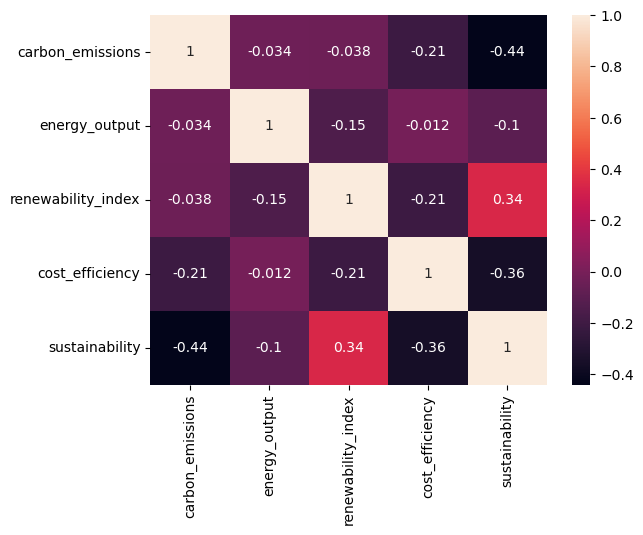

In [35]:
sns.heatmap(data = data.corr(), annot=True)
plt.show()


In [37]:
X = data[['carbon_emissions', 'renewability_index', 'cost_efficiency']]
y = data['sustainability']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [41]:
X_train.head()

,carbon_emissions,renewability_index,cost_efficiency
49,114.699059,0.853009,3.316370
34,387.971212,0.195243,0.707012
7,353.161651,0.663502,1.953304
95,222.828459,0.522243,4.688408
27,229.982053,0.393098,3.252743


In [43]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

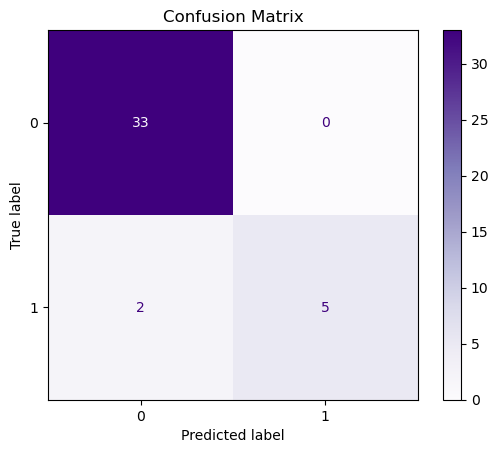

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions using the logistic regression model
y_pred = model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Purples)  # Choose a color map like Purples for visualization
plt.title("Confusion Matrix")
plt.show()


In [47]:
print(classification_report(y_test, y_pred, target_names=['Not Sustainable', 'Sustainable']))

                 precision    recall  f1-score   support

Not Sustainable       0.94      1.00      0.97        33
    Sustainable       1.00      0.71      0.83         7

       accuracy                           0.95        40
      macro avg       0.97      0.86      0.90        40
   weighted avg       0.95      0.95      0.95        40



In [49]:
coefficients = pd.DataFrame(model.coef_.T, index=X.columns, columns=['Coefficient'])
print(coefficients)

                    Coefficient
carbon_emissions      -0.017791
renewability_index     0.712932
cost_efficiency       -1.230857


In [51]:
import joblib 
joblib.dump(model, 'lrmodel_sustainable.pkl')

['lrmodel_sustainable.pkl']